In [1]:
import pandas as pd
from mplsoccer import VerticalPitch, add_image, FontManager
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from highlight_text import ax_text, fig_text
from matplotlib import patches
from matplotlib.patches import FancyArrowPatch
from PIL import Image
from urllib.request import urlopen
import matplotlib.font_manager as font_manager
from statsbombpy import sb
import seaborn as sns

 
textc='#1d1d1d'
linec='#808080'
font="Copperplate"
bgcolor="white"#'#f1faee'
color1='#e21017' #red
color2='#9a9a9a' #grey
color3='#457b9d'
color4='#B2B3A9'
color5='#1d3557'
color6="#006daa"
pathcolor="#C4D5CB"
arrowedge=bgcolor

 
team="Wigan Athletic"


 
cmaplist = [bgcolor,color2,color1]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

 
path_eff = [path_effects.Stroke(linewidth=2, foreground=color2),
path_effects.Normal()]

 
plt.rcParams.update({'font.family': font})


 
df = sb.competition_events(
    country="England",
    division= "League One",
    season="2023/2024",
    split=False,
    creds = {'user':'j.walmsley@wiganathletic.com','passwd':'pGgHfgIK'}
)

comps = sb.competitions(
       creds = {'user':'j.walmsley@wiganathletic.com','passwd':'pGgHfgIK'}
)

matches = sb.matches(
         competition_id=4, 
         season_id=281,
         creds = {'user':'j.walmsley@wiganathletic.com','passwd':'pGgHfgIK'}
)



df = df.merge(matches[['match_id', 'home_team', 'away_team']], how='left', on='match_id')
df['opposing_team'] = np.where(df['team']==df['home_team'], df['away_team'], df['home_team'])


#DROPPING ROWS
df = df.dropna( how='all',
                  subset=['pass_cross'])

df["pass_outcome"].fillna("Complete", inplace = True)
df = df[(df["pass_type"]!="Corner") & (df["pass_type"]!="Free Kick") & (df["pass_type"]!="Throw-in")]



df['x'] = df['location'].str[0]
df['y'] = df['location'].str[1]
df['z'] = df['location'].str[2]

df['pass_end_x'] = df['pass_end_location'].str[0]
df['pass_end_y'] = df['pass_end_location'].str[1]

df['eventstartlocation_x'] = df['location'].str[0]
df['eventstartlocation_y'] = df['location'].str[1]
 


df2 = df
df3 = df
df4 = df
    
pitch = VerticalPitch(half=True,pitch_type='statsbomb',
pitch_color=bgcolor, line_color=linec,line_zorder=5,pad_top=10)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsbombpy/sb.py:153: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  competition_events = pd.concat(


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


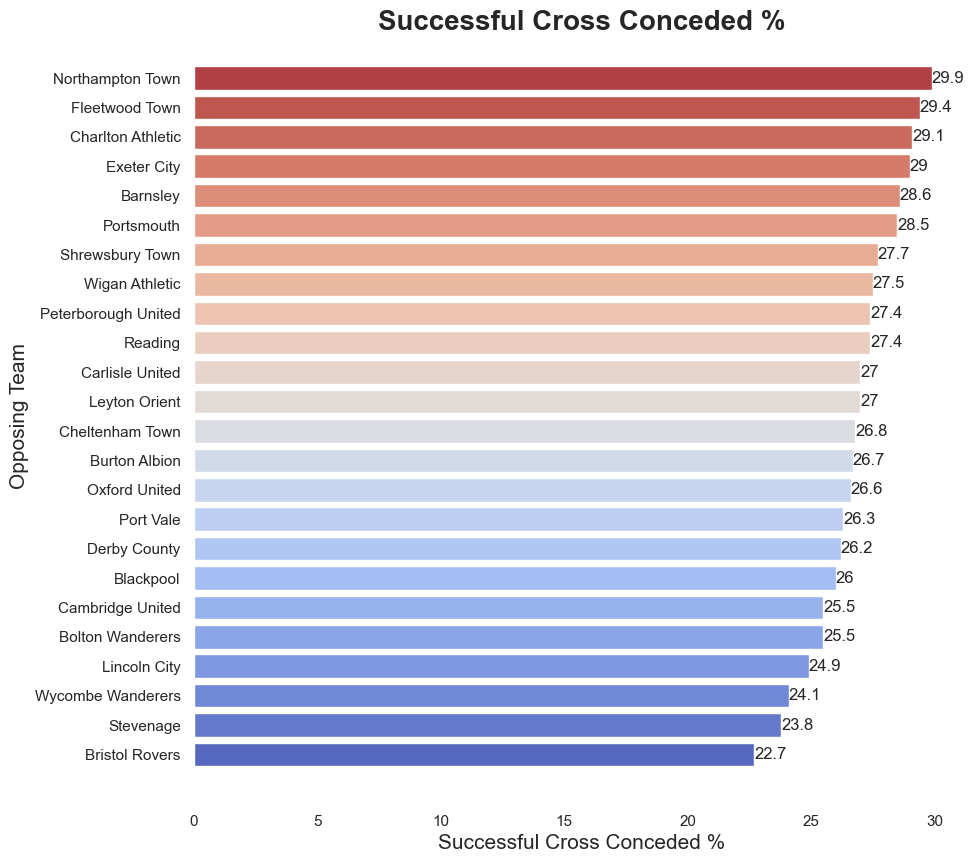

In [9]:
df2=df2[(df2["pass_end_x"]>=102) & (df2["pass_end_y"]>=18)
& (df2["pass_end_y"]<=62)]


#get count for each team
count2_df=df2['opposing_team'].value_counts().to_frame('cross conceded').reset_index()
count2_df = count2_df.rename(columns={'index': 'opposing_team'})
#merge completed and attempted counts


#########################################################################################################################################

df3["pass_outcome"].fillna("Complete", inplace = True)

#filter for only completed passes
df3=df3[df3["pass_outcome"]=="Complete"]

#filter for passes that ended within the 18 yard box
df3=df3[(df3["pass_end_x"]>=102) & (df3["pass_end_y"]>=18)
& (df3["pass_end_y"]<=62)]


#get count for each team
count3_df=df3['opposing_team'].value_counts().to_frame('successful cross conceded').reset_index()
count3_df = count3_df.rename(columns={'index': 'opposing_team'})
#merge completed and attempted counts


#########################################################################################################################################

grouped_df=pd.merge(count2_df,count3_df,
how="outer", on=["opposing_team"])

grouped_df["Successful Cross Conceded %"]=(
    grouped_df["successful cross conceded"]/grouped_df["cross conceded"]*100
).round(1)


grouped_df = grouped_df.drop('successful cross conceded', axis=1)
grouped_df = grouped_df.drop('cross conceded', axis=1)

grouped_df.sort_values(by='Successful Cross Conceded %', ascending=False, inplace=True)



#create bar chart
ax, fig = plt.subplots(figsize=[10,10])
sns.barplot(data=grouped_df, x="Successful Cross Conceded %", y="opposing_team", palette=sns.color_palette("coolwarm_r", n_colors=24, desat=1))
plt.xlabel(xlabel="Successful Cross Conceded %",fontsize=15)
plt.ylabel(ylabel="Opposing Team",fontsize=15)
plt.title("Successful Cross Conceded %",fontsize=20,ha='center',va='center',weight='bold')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.despine(top=True, right=True, left=False, bottom=False)

fig.bar_label(fig.containers[0], label_type='edge')

plt.autoscale()
plt.show()


#########################################################################################################################################
grouped_df.to_csv('/Users/wafc1stteam/Desktop/grouped_df.csv')
#########################################################################################################################################



